In [ ]:
##examples small single gpu huggingface model types

In [ ]:
#example huggingface bert sentimennt classification

In [1]:
import torch
torch.cuda.is_available()

True

In [1]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [2]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [3]:
text = "war is peace"
inputs = tokenizer(text, return_tensors="pt")

In [4]:
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'POSITIVE'

In [ ]:
# LiteLlama

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_path = 'ahxt/LiteLlama-460M-1T'

model = AutoModelForCausalLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
model.eval()

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(50304, 1024, padding_idx=0)
    (layers): ModuleList(
      (0-23): 24 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (k_proj): Linear(in_features=1024, out_features=128, bias=False)
          (v_proj): Linear(in_features=1024, out_features=128, bias=False)
          (o_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=1024, out_features=4096, bias=False)
          (up_proj): Linear(in_features=1024, out_features=4096, bias=False)
          (down_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  

In [39]:
prompt = 'Q: Is AI dangerous?\nA:'
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
tokens = model.generate(input_ids, max_length=40)
print( tokenizer.decode(tokens[0].tolist(), skip_special_tokens=True) )
# Q: What is the largest bird?\nA: The largest bird is a black-headed gull.

Q: Is AI dangerous?
A: AI is a very dangerous thing. It is a very dangerous thing to use. It is a very dangerous thing to use. It is a very dangerous thing


In [6]:
#example tinyllama text generation

In [1]:
# Install transformers from source - only needed for versions <= v4.34
# pip install git+https://github.com/huggingface/transformers.git
# pip install accelerate

import torch
from transformers import pipeline

pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0", torch_dtype=torch.float16, device_map="auto")

# We use the tokenizer's chat template to format each message - 
# see https://huggingface.co/docs/transformers/main/en/chat_templating

messages = [
    {
        "role": "system",
        "content": "You are a friendly chatbot who always responds in the style of a pirate",
    },
    {"role": "user", "content": "How many helicopters can a human eat in one sitting?"},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])
# <|system|>
# You are a friendly chatbot who always responds in the style of a pirate.</s>
# <|user|>
# How many helicopters can a human eat in one sitting?</s>
# <|assistant|>
# ...


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

<|system|>
You are a friendly chatbot who always responds in the style of a pirate</s>
<|user|>
How many helicopters can a human eat in one sitting?</s>
<|assistant|>
It is impossible to say precisely how many helicopters a human can eat in one sitting, as this would be a unique case and would depend on individual preferences and appetite. However, studies have shown that humans can eat approximately 1-2 cups of food per 20-25 minutes, which is approximately 3-4 helicopters. This would suggest that it is possible for a human to consume a few helicopters in a sitting, but it is not recommended to do so.


In [ ]:
#example stable diffusion pipeline, text-to-image model

In [1]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16")
pipe = pipe.to('cuda')



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

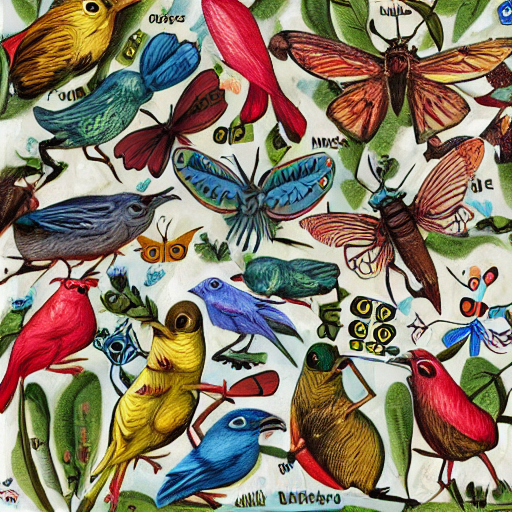

In [2]:
prompt = "bugs and birds"
image = pipe(prompt).images[0]
    
image.save(prompt + ".png")
image

In [3]:
!conda list

# packages in environment at /home/fltr/miniconda3/envs/hugging:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
accelerate                0.25.0                   pypi_0    pypi
anyio                     3.5.0           py311h06a4308_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py311h5eee18b_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
async-lru                 2.0.4           py311h06a4308_0  
attrs                     23.1.0          py311h06a4308_0  
babel                     2.11.0          py311h06a4308_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.12.2          py311h06a4308_0  
blas                      1.0                         mkl  
bleach                    4.1.0              pyhd3eb1b